Filtern

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'C:/Users/oache/Desktop/KI_ML/vehicles/vehicles.csv'
#url= 'C:/Users/nicof/OneDrive/Dokumente/FH-München/KI\Modularbeit/archive/vehicles.csv'
df_allvehicles = pd.read_csv(url)
  
  





In [3]:

df_vehicles_filtered = df_allvehicles.drop(['id','VIN','url','region_url','size','image_url','description','county','lat','long'],axis=1)  

df_vehicles_filtered = df_vehicles_filtered.dropna(subset=['manufacturer', 'price','model','year'])
#df_vehicles_filtered.head(5)

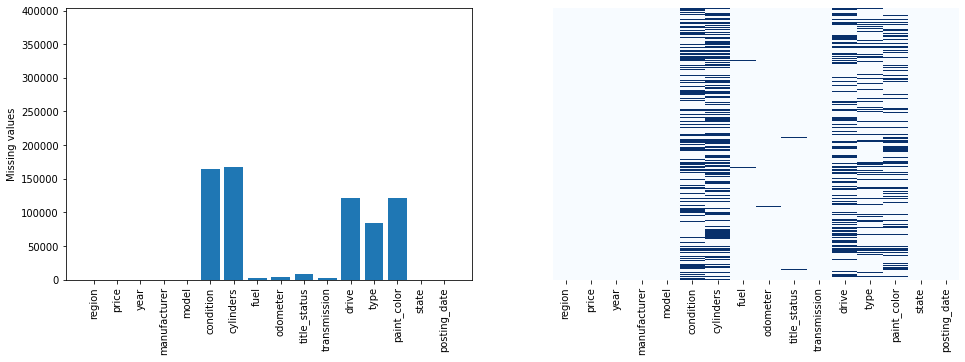

In [4]:
#Fehlende Daten veranschaulichen
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,5))

ax1.bar(df_vehicles_filtered.columns,df_vehicles_filtered.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df_vehicles_filtered.shape[0])
ax1.tick_params('x',labelrotation=90)
sns.heatmap(df_vehicles_filtered.isna(),yticklabels=False,cbar=False, cmap='Blues',ax=ax2)
plt.show()




In [5]:
#Lösche Zeilen mit mehr als 9 fehlenden Einträgen
df_vehicles_filtered.dropna(subset=['year','manufacturer','model', 'condition', 'cylinders', 'fuel','odometer','title_status','transmission', 
                    'drive', 'type', 'paint_color', 'state', 'posting_date'], axis=0, thresh=9, inplace=True)
#df_vehicles_filtered.shape


C:\Users\oache\AppData\Local\Temp\ipykernel_18920\3759267592.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_vehicles_filtered.hist('price','manufacturer',ax=ax,grid=1)


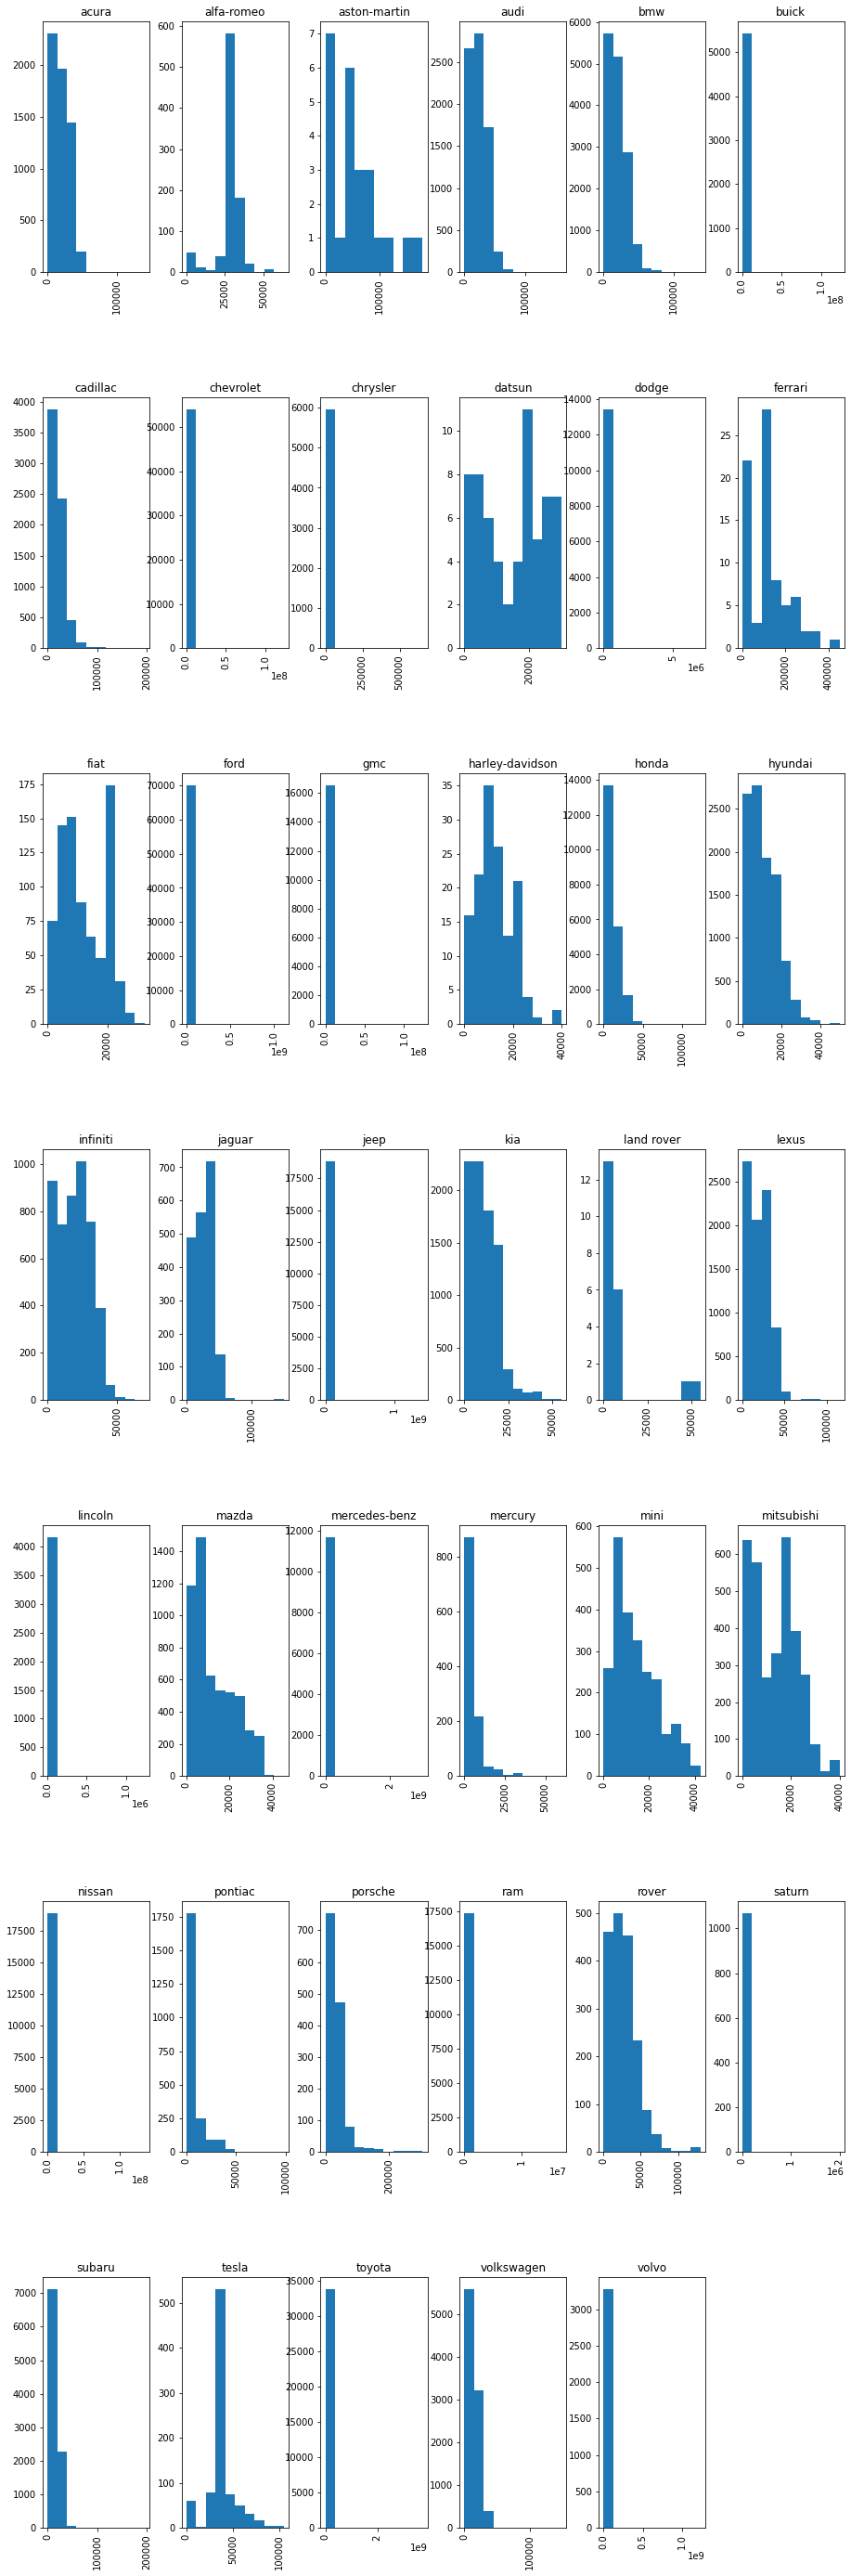

In [6]:
fig,ax=plt.subplots(1,1,figsize=(15,50))
df_vehicles_filtered.hist('price','manufacturer',ax=ax,grid=1)
ax.set(xlabel="Count", ylabel='price')
#ax.ylabel("price")
plt.xticks(rotation=90)

plt.show()

In [7]:
max_price=500000
max_price_exc=df_vehicles_filtered[df_vehicles_filtered['price'] > max_price].index
max_price_exc.shape



(34,)

In [8]:
unreal_prices = df_vehicles_filtered[(df_vehicles_filtered['price'] >= 150000)
                & 
                ( (df_vehicles_filtered['manufacturer'] !='porsche')
                | (df_vehicles_filtered['manufacturer'] !='jaguar')
                | (df_vehicles_filtered['manufacturer'] !='mercedes')
                | (df_vehicles_filtered['manufacturer'] !='rover')
                | (df_vehicles_filtered['manufacturer'] !='tesla')
                | (df_vehicles_filtered['manufacturer'] !='aston-martin')
                | (df_vehicles_filtered['manufacturer'] !='ferrari')) ].index
df_vehicles_filtered.drop(unreal_prices , inplace=True)

In [9]:
min_price=0
min_price_fb = df_vehicles_filtered[(df_vehicles_filtered['price'] <= min_price)].index
df_vehicles_filtered.drop( min_price_fb, inplace=True)

In [10]:
count_model=df_vehicles_filtered['model'].value_counts()

In [11]:
# df_count_model=df_vehicles_filtered.drop(['region','price'm],axis=1)  
# count_model2=df_vehicles_filtered.groupby('model').count()

In [12]:
# df_vehicles_filtered.model=df_vehicles_filtered.loc[df_vehicles_filtered.model.str.contains('mdx'),'model'] = 'scheiss python'

In [13]:
import re

search_string = 'sierra'
replace_string = 'adsfasdf'
altered = [re.sub(re.escape(search_string),replace_string,val) for val in df_vehicles_filtered.model]
print(altered)
#df_vehicles_filtered.head()

['adsfasdf 1500 crew cab slt', 'silverado 1500', 'silverado 1500 crew', 'tundra double cab sr', 'f-150 xlt', 'adsfasdf 2500 hd extended cab', 'silverado 1500 double', 'tacoma', 'colorado extended cab', 'corvette grand sport', 'cherokee', 'wrangler unlimited sport', 'silverado 1500 regular', 'colorado crew cab z71', 'tacoma access cab pickup', 'camaro ss coupe 2d', 'tundra crewmax sr5 pickup', 'ranger supercrew xl pickup', 'frontier crew cab pro-4x', 'f150 super cab xl pickup 4d', 'tacoma double cab sr5', 'wrangler sport suv 2d', 'f150 supercrew cab xlt', '1500 regular cab tradesman', 'mx-5 miata club', 'ranger supercab xl pickup', 'xt4 sport suv 4d', 'f250 super duty', 'renegade sport suv 4d', 'f150 regular cab xl pickup', 'adsfasdf 1500 regular cab', 'odyssey', '1500 quad cab express pickup', 'adsfasdf 1500 extended cab slt', '1500 classic regular cab', 'mustang gt premium', 'colorado extended cab', 'f450', 'silverado 1500 ld', 'tundra double cab pickup', 'silverado 1500 double', 'sil